In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Load files

In [2]:
df_12_15 = pandas.read_excel('../data/GTD_0616dist/gtd_12to15_0616dist.xlsx')

In [1]:
df_16 = pandas.read_excel('../data/Global Terrorism Database 2015-2016 Preliminary Data EMBARGOED.xlsx')
df_16 = df_16[df_16.iyear == 2016]

NameError: name 'pandas' is not defined

In [13]:
df = pandas.concat([df_12_15, df_16])

In [15]:
df['datetime'] = pandas.to_datetime((df.iyear*10000+df.imonth*100+df.iday).apply(str),format='%Y%m%d')

## Last year in sum

In [73]:
df_16.country_txt.value_counts()[:10]

Iraq           3351
Afghanistan    1611
India          1011
Pakistan        857
Philippines     629
Somalia         587
Turkey          537
Nigeria         531
Yemen           518
Syria           469
Name: country_txt, dtype: int64

In [76]:
df_16.gname.value_counts()[:10]

Unknown                                        5947
Islamic State of Iraq and the Levant (ISIL)    1428
Taliban                                        1059
Al-Shabaab                                      545
Kurdistan Workers' Party (PKK)                  359
Huthi Extremists                                348
Maoists                                         267
Boko Haram                                      237
Tripoli Province of the Islamic State           183
New People's Army (NPA)                         171
Name: gname, dtype: int64

In [77]:
df_16.weaptype1_txt.value_counts()[:10]

Explosives/Bombs/Dynamite                                                      7541
Firearms                                                                       3427
Unknown                                                                        1448
Incendiary                                                                      613
Melee                                                                           328
Chemical                                                                         28
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      12
Other                                                                            10
Sabotage Equipment                                                                8
Name: weaptype1_txt, dtype: int64

## Were there any days without terror? Nope.

In [23]:
print 'MIN DATE', df.datetime.min()
print 'MAX DATE', df.datetime.max()

MIN DATE 2012-01-01 00:00:00
MAX DATE 2016-12-31 00:00:00


In [20]:
import numpy as np
from datetime import timedelta

In [21]:
timerange = np.arange(df.datetime.min(),df.datetime.max(), timedelta(days=1)).astype(datetime)

In [22]:
set(df.datetime) - set(timerange)

{Timestamp('2016-12-31 00:00:00')}

## Let's look at year-to-year variation mayble plot dist on same x-y 

In [17]:
print 2016, len(df[df.datetime > '2016']) 
print 2015, len(df[(df.datetime > '2015') & (df.datetime <= '2016')]) 
print 2014, len (df[(df.datetime > '2014') & (df.datetime <= '2015')])
print 2013, len(df[(df.datetime > '2013') & (df.datetime <= '2014')])
print 2012, len(df[(df.datetime > '2012') & (df.datetime <= '2013')])

2016 13415
2015 29580
2014 16899
2013 12003
2012 8504


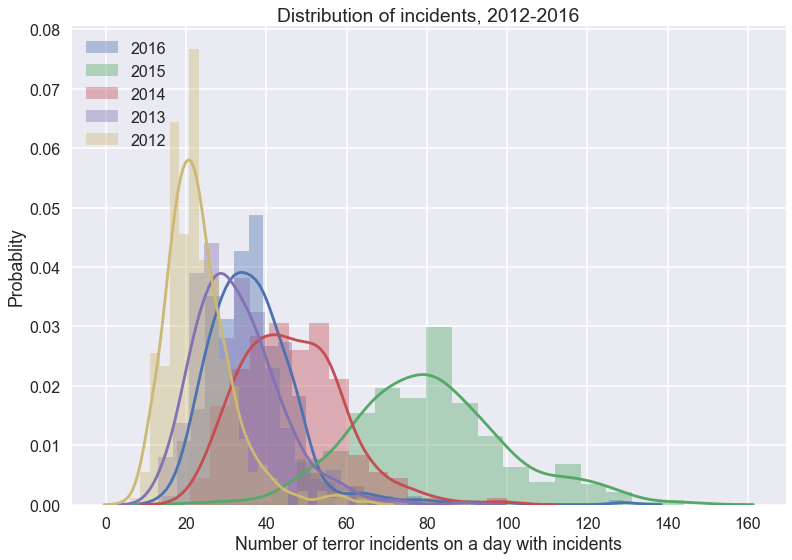

In [18]:
sns.distplot(df[df.datetime > '2016'].datetime.value_counts(), label='2016')
sns.distplot(df[(df.datetime > '2015') & (df.datetime <= '2016')].datetime.value_counts(), label='2015')
sns.distplot(df[(df.datetime > '2014') & (df.datetime <= '2015')].datetime.value_counts(), label='2014')
sns.distplot(df[(df.datetime > '2013') & (df.datetime <= '2014')].datetime.value_counts(), label='2013')
sns.distplot(df[(df.datetime > '2012') & (df.datetime <= '2013')].datetime.value_counts(), label='2012')

plt.legend(loc='upper left')
plt.ylabel('Probablity')
plt.xlabel('Number of terror incidents on a day with incidents')
plt.title("Distribution of incidents, 2012-2016")
 

## Last year in Terror

In [25]:
df_16 = df[df.datetime > '2016']

In [69]:
df_16.country_txt.value_counts()[:10]
print "\n".join(df_16.columns)
print df_16.gname

INT_ANY
INT_IDEO
INT_LOG
INT_MISC
addnotes
alternative
alternative_txt
approxdate
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
city
claim2
claim3
claimed
claimmode
claimmode2
claimmode2_txt
claimmode3
claimmode3_txt
claimmode_txt
compclaim
corp1
corp2
corp3
country
country_txt
crit1
crit2
crit3
dbsource
divert
doubtterr
eventid
extended
gname
gname2
gname3
gsubname
gsubname2
gsubname3
guncertain1
guncertain2
guncertain3
hostkidoutcome
hostkidoutcome_txt
iday
imonth
ingroup
ingroup2
ingroup3
ishostkid
iyear
kidhijcountry
latitude
location
longitude
motive
multiple
natlty1
natlty1_txt
natlty2
natlty2_txt
natlty3
natlty3_txt
ndays
nhostkid
nhostkidus
nhours
nkill
nkillter
nkillus
nperpcap
nperps
nreleased
nwound
nwoundte
nwoundus
propcomment
property
propextent
propextent_txt
propvalue
provstate
ransom
ransomamt
ransomamtus
ransomnote
ransompaid
ransompaidus
region
region_txt
related
resolution
scite1
scite2
scite3
specificity
success
suicide
summary

### Generate random day : What would it look like?

In [54]:
year = np.arange(df_16.datetime.min(),df_16.datetime.max(), timedelta(days=1)).astype(datetime)
days = np.random.choice(year, 5) 

In [194]:
for d in days:
    print d.date()
    #print df_16[df_16.datetime == d].country_txt.value_counts()
    #print df_16[df_16.datetime == d].country_txt.value_counts()
    #print df_16[df_16.datetime == d].groupby(['country_txt', 'gname','attacktype1_txt'], as_index=False).size()
    print df_16[df_16.datetime == d].groupby(['country_txt', 'gname'], as_index=False).size()
    #print df_16[df_16.datetime == d].gname.value_counts()
    print
    print

2016-12-14
country_txt                       gname                                      
Afghanistan                       Unknown                                        2
Colombia                          National Liberation Army of Colombia (ELN)     1
Democratic Republic of the Congo  Mayi Mayi                                      1
Ecuador                           Shuar extremists                               1
Egypt                             Sinai Province of the Islamic State            1
                                  Unknown                                        1
India                             Hizbul Mujahideen (HM)                         1
Iraq                              Islamic State of Iraq and the Levant (ISIL)    7
                                  Unknown                                        4
Nigeria                           Fulani Militants                               1
Pakistan                          Sindhu Desh Liberation Army (SDLA)             

In [204]:
datetime.today().date() - timedelta(days=365)

datetime.date(2016, 4, 28)

In [205]:

print df_16[df_16.datetime == datetime.today().date() - timedelta(days=365)].groupby(['country_txt', 'gname'], as_index=False).size()

country_txt               gname                                                
Afghanistan               Muslim extremists                                         1
                          Taliban                                                   5
                          Unknown                                                   1
Burundi                   Unknown                                                   1
Cameroon                  Boko Haram                                                1
China                     Uighur Separatists                                        1
India                     Maoists                                                   1
                          United Liberation Front of Assam (ULFA)                   2
                          Unknown                                                   2
Iraq                      Islamic State of Iraq and the Levant (ISIL)               2
                          Unknown                           

# Manual check for ripple effect

Last year, only 9 incidents out of 59 in the US resulted in fatalities.

In [116]:
print len(df_16[df_16.country_txt == 'United States'])
fatalities = df_16[(df_16.country_txt == 'United States') & df_16.nkill > 0].sort_values('nkill', ascending=False)[['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]
fatalities

59


,datetime,gname,city,targtype1_txt,nkill
21168,2016-06-12,Jihadi-Inspired extremists,Orlando,Business,50.0
22085,2016-07-07,Anti-White extremists,Dallas,Police,6.0
22414,2016-07-17,Anti-Police extremists,Baton Rouge,Police,4.0
23528,2016-08-13,Unknown,New York City,Religious Figures/Institutions,2.0
24601,2016-09-16,Anti-Police extremists,Philadelphia,Police,2.0
16416,2016-02-11,Muslim extremists,Columbus,Business,1.0
22094,2016-07-07,Anti-Police extremists,Bristol,Police,1.0
24628,2016-09-17,Jihadi-Inspired extremists,St. Cloud,Business,1.0
27312,2016-11-28,Jihadi-Inspired extremists,Columbus,Private Citizens & Property,1.0


In [110]:
COUNTRY = 'United States'
df_country = df_16[df_16.country_txt == 'United States']

47
47


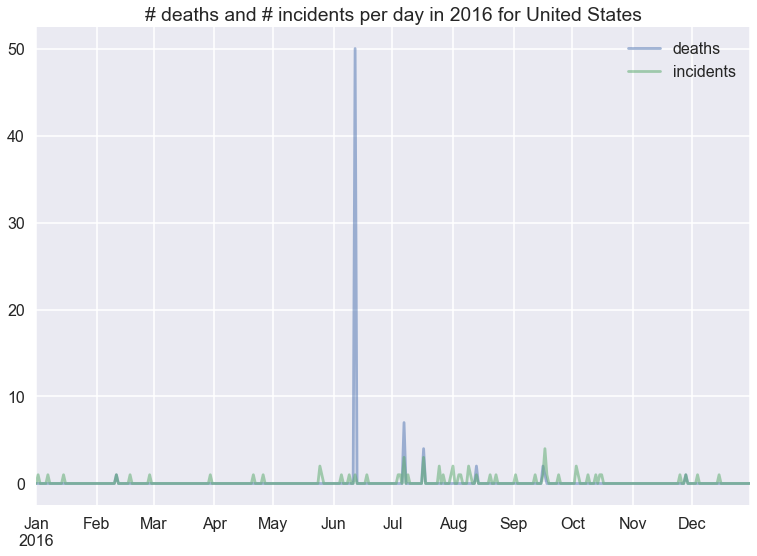

In [111]:
nkill = df_country.groupby('datetime').nkill.sum()
print len(nkill)
counts = df_country.groupby('datetime').eventid.count()
print len(counts)
df_country = pandas.concat([nkill, counts], axis=1)
df_country.columns = ['deaths', 'incidents']
# Fill missing dates
idx = pandas.date_range('01-01-2016', '12-31-2016') # Resample fill in missing dates
df_country = df_country.reindex(idx, fill_value=0) 
df_country.plot(alpha=0.5)
plt.title("# deaths and # incidents per day in 2016 for " + COUNTRY)

In [113]:
 fatalities.index

Int64Index([21168, 22085, 22414, 23528, 24601, 16416, 22094, 24628, 27312], dtype='int64')

## Spot-check around Orlando

In [115]:
orlando = fatalities.index[0]

In [117]:
fatalities

,datetime,gname,city,targtype1_txt,nkill
21168,2016-06-12,Jihadi-Inspired extremists,Orlando,Business,50.0
22085,2016-07-07,Anti-White extremists,Dallas,Police,6.0
22414,2016-07-17,Anti-Police extremists,Baton Rouge,Police,4.0
23528,2016-08-13,Unknown,New York City,Religious Figures/Institutions,2.0
24601,2016-09-16,Anti-Police extremists,Philadelphia,Police,2.0
16416,2016-02-11,Muslim extremists,Columbus,Business,1.0
22094,2016-07-07,Anti-Police extremists,Bristol,Police,1.0
24628,2016-09-17,Jihadi-Inspired extremists,St. Cloud,Business,1.0
27312,2016-11-28,Jihadi-Inspired extremists,Columbus,Private Citizens & Property,1.0


Don't see anything around orlando...

In [123]:
df_16[(df_16.imonth == 6) & (df_16.country_txt == 'United States')][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]

,datetime,gname,city,targtype1_txt,nkill
20931,2016-06-05,Unknown,New York City,Religious Figures/Institutions,0.0
21089,2016-06-09,Unknown,New York City,Religious Figures/Institutions,0.0
21168,2016-06-12,Jihadi-Inspired extremists,Orlando,Business,50.0
21402,2016-06-18,Anti-Trump extremists,Las Vegas,Private Citizens & Property,0.0


One incident following Dallas at College station

In [125]:
df_16[(df_16.imonth == 7) & (df_16.country_txt == 'United States')][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]

,datetime,gname,city,targtype1_txt,nkill
22029,2016-07-04,Black Hebrew Israelites,St. Louis,Religious Figures/Institutions,0.0
22061,2016-07-05,Black Hebrew Israelites,St. Louis,Religious Figures/Institutions,0.0
22085,2016-07-07,Anti-White extremists,Dallas,Police,6.0
22094,2016-07-07,Anti-Police extremists,Bristol,Police,1.0
22095,2016-07-07,Anti-Muslim extremists,College Station,Religious Figures/Institutions,0.0
22159,2016-07-09,Unknown,San Antonio,Police,0.0
22414,2016-07-17,Anti-Police extremists,Baton Rouge,Police,4.0
22428,2016-07-17,Anti-Police extremists,Daytona Beach,Police,0.0
22480,2016-07-17,Unknown,Tampa,Educational Institution,0.0
22763,2016-07-25,Unknown,Las Vegas,Religious Figures/Institutions,0.0


In [127]:
df_16[(df_16.gname == 'Anti-Muslim extremists') & (df_16.country_txt == 'United States')][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]

,datetime,gname,city,targtype1_txt,nkill
15370,2016-01-15,Anti-Muslim extremists,New York City,Private Citizens & Property,0.0
22095,2016-07-07,Anti-Muslim extremists,College Station,Religious Figures/Institutions,0.0
24501,2016-09-12,Anti-Muslim extremists,Fort Pierce,Religious Figures/Institutions,0.0


In [132]:
set(df[df.country_txt=='United States'].gname)

{u'Anarchists',
 u'Animal Liberation Front (ALF)',
 u'Anti-Muslim extremists',
 u'Anti-Police extremists',
 u'Anti-Semitists',
 u'Anti-Trump extremists',
 u'Anti-White extremists',
 u'Black Hebrew Israelites',
 u'Citizens for Constitutional Freedom',
 u'Court Reform extremists',
 u'Jihadi-Inspired extremists',
 u'Muslim extremists',
 u'Sovereign Citizen',
 u'Unaffiliated Individual(s)',
 u'United Aryan Empire',
 u'Unknown',
 u'Veterans United for Non-Religious Memorials',
 u'White Extremists'}

In [139]:
df_16[(df_16.gname.isin(['Anti-Semitists','White Extremists','Anti-Muslim extremists','United Aryan Empire'])) & (df_16.country_txt == 'United States')][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]
df_16[(df_16.gname == 'Citizens for Constitutional Freedom') & (df_16.country_txt == 'United States')][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]

,datetime,gname,city,targtype1_txt,nkill
14896,2016-01-02,Citizens for Constitutional Freedom,Princeton,Government (General),0.0


## All Countries — 🐔 and 🥚 ?

In [154]:
set(df.gname)

{nan,
 u'313 Brigade (Syria)',
 u"A'chik Matgrik Elite Force (AMEF)",
 u'Aba Cheali Group',
 u'Abbala extremists',
 u'Abdul Ghani Kikli Militia',
 u'Abdul Qader Husseini Battalions of the Free Palestine movement',
 u'Abdullah Azzam Brigades',
 u'Abida Tribe',
 u'Abu Bakr Unis Jabr Brigade',
 u'Abu Jaafar al-Mansur Brigades',
 u'Abu Obaida bin Jarrah Brigade',
 u"Abu Salim Martyr's Brigade",
 u'Abu Sayyaf Group (ASG)',
 u'Abu Tira (Central Reserve Forces)',
 u'Aceh Singkil Islamic Care Youth Students Association (PPI)',
 u'Achik Matgrik Army (AMA)',
 u'Achik National Cooperative Army (ANCA)',
 u'Achik National Liberation Army (ANLA)',
 u'Achik National Volunteer Council-B (ANVC-B)',
 u"Achik Songna An'pachakgipa Kotok (ASAK)",
 u'Achik Tiger Force',
 u'Activists',
 u'Adan-Abyan Province of the Islamic State',
 u'Adivasi National Liberation Army (ANLA)',
 u"Adivasi People's Army (APA)",
 u'Afar Revolutionary Democratic Unity Front',
 u'Agwelek Forces',
 u'Ahfad al-Sahaba-Aknaf Bayt al-Ma

In [162]:
df_16[df_16.gname =='White Extremists'][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]
#df_16[df_16.gname =='Anti-Muslim extremists'][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]
#df_16[df_16.gname =='Anti-Semitists'][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']]

,datetime,gname,city,targtype1_txt,nkill
16730,2016-02-18,White Extremists,Nashville,Private Citizens & Property,0.0
17094,2016-02-28,White Extremists,Lake Los Angeles,Private Citizens & Property,0.0


In [167]:
df_16[(df_16.country_txt == 'United States') & (df_16.nkill > 0)][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']].sort_values('nkill', ascending=False)

,datetime,gname,city,targtype1_txt,nkill
21168,2016-06-12,Jihadi-Inspired extremists,Orlando,Business,50.0
22085,2016-07-07,Anti-White extremists,Dallas,Police,6.0
22414,2016-07-17,Anti-Police extremists,Baton Rouge,Police,4.0
23528,2016-08-13,Unknown,New York City,Religious Figures/Institutions,2.0
24601,2016-09-16,Anti-Police extremists,Philadelphia,Police,2.0
16416,2016-02-11,Muslim extremists,Columbus,Business,1.0
22094,2016-07-07,Anti-Police extremists,Bristol,Police,1.0
24628,2016-09-17,Jihadi-Inspired extremists,St. Cloud,Business,1.0
27312,2016-11-28,Jihadi-Inspired extremists,Columbus,Private Citizens & Property,1.0


In [186]:
len(df_16.country_txt.unique())

108

In [190]:
df_16.country_txt.value_counts().to_csv('../data/2016-incidents-by-country.csv')

In [184]:
len(df_16[(df_16.country_txt == 'United Kingdom')])

103

In [183]:
df_16[(df_16.country_txt == 'United Kingdom') & (df_16.nkill > 0)][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']].sort_values('nkill', ascending=False)

,datetime,gname,city,targtype1_txt,nkill
15086,2016-01-07,Irish National Liberation Army (INLA),Belfast,Private Citizens & Property,1.0
16729,2016-02-18,Jihadi-Inspired extremists,Rochdale,Religious Figures/Institutions,1.0
16987,2016-02-25,Irish National Liberation Army (INLA),Belfast,Private Citizens & Property,1.0
17269,2016-03-04,The New Irish Republican Army,Belfast,Police,1.0
18057,2016-03-24,Muslim extremists,Glasgow,Private Citizens & Property,1.0
18827,2016-04-15,The New Irish Republican Army,Belfast,Private Citizens & Property,1.0
19814,2016-05-09,Dissident Republicans,Belfast,Private Citizens & Property,1.0
21336,2016-06-16,Neo-Nazi Group,Birstall,Government (General),1.0
25867,2016-10-20,Dissident Republicans,Belfast,Private Citizens & Property,1.0


In [185]:
len(df_16[(df_16.country_txt == 'France')])

25

In [191]:
df_16[(df_16.country_txt == 'France') & (df_16.nkill > 0)][['datetime', 'gname', 'city', 'targtype1_txt', 'nkill']].sort_values('nkill', ascending=False)

,datetime,gname,city,targtype1_txt,nkill
22312,2016-07-14,Jihadi-Inspired extremists,Nice,Private Citizens & Property,87.0
21210,2016-06-13,Jihadi-Inspired extremists,Magnanville,Police,3.0
22773,2016-07-26,Jihadi-Inspired extremists,Saint-Etienne-du-Rouvray,Religious Figures/Institutions,3.0
15066,2016-01-07,Jihadi-Inspired extremists,Paris,Police,1.0
27868,2016-12-16,Unknown,Boulogne-Billancourt,Other,1.0


In [206]:
df_16.country_txt.value_counts()

Iraq                                3351
Afghanistan                         1611
India                               1011
Pakistan                             857
Philippines                          629
Somalia                              587
Turkey                               537
Nigeria                              531
Yemen                                518
Syria                                469
Libya                                416
Egypt                                365
Thailand                             327
Sudan                                172
Democratic Republic of the Congo     167
West Bank and Gaza Strip             157
Saudi Arabia                         123
United Kingdom                       103
Mali                                  94
Bangladesh                            87
Colombia                              84
Burundi                               81
Mozambique                            78
Myanmar                               73
Kenya           

## Deadliest terror attacks 2016

In [213]:
df_16[df_16.nkill > 0][['country_txt', 'datetime', 'gname', 'city', 'targtype1_txt', 'nkill']].sort_values('nkill', ascending=False)[:20]

,country_txt,datetime,gname,city,targtype1_txt,nkill
27719,Syria,2016-12-10,Islamic State of Iraq and the Levant (ISIL),Palmyra,Private Citizens & Property,421.0
21920,Iraq,2016-07-03,Islamic State of Iraq and the Levant (ISIL),Baghdad,Business,383.0
16286,Iraq,2016-02-07,Islamic State of Iraq and the Levant (ISIL),Mosul,Police,300.0
25927,Iraq,2016-10-21,Islamic State of Iraq and the Levant (ISIL),Mosul,Private Citizens & Property,284.0
23750,South Sudan,2016-08-19,Sudan People's Liberation Movement in Oppositi...,Pajut,Private Citizens & Property,283.0
19054,Iraq,2016-04-21,Islamic State of Iraq and the Levant (ISIL),Mosul,Private Citizens & Property,250.0
26074,Iraq,2016-10-26,Islamic State of Iraq and the Levant (ISIL),Hammam al-Alil,Private Citizens & Property,190.0
25254,Afghanistan,2016-10-03,Taliban,Kunduz,Private Citizens & Property,154.0
15360,Somalia,2016-01-15,Al-Shabaab,Ceel Cadde,Military,141.0
27363,Iraq,2016-10-29,Islamic State of Iraq and the Levant (ISIL),Hammam al-Alil,Police,130.0


## Deadliest countries for terror 2016

In [224]:
df_16.groupby('country_txt').sum()['nkill'].sort_values(ascending=False)[:30]

country_txt
Iraq                                12156.0
Afghanistan                          6101.0
Syria                                2741.0
Nigeria                              2164.0
Somalia                              1554.0
Yemen                                1512.0
Pakistan                             1111.0
Turkey                               1000.0
South Sudan                           633.0
Libya                                 630.0
Egypt                                 603.0
Democratic Republic of the Congo      532.0
India                                 458.0
Philippines                           404.0
Ethiopia                              279.0
Cameroon                              245.0
Mali                                  199.0
Central African Republic              189.0
Sudan                                 176.0
Saudi Arabia                          161.0
Niger                                 157.0
Thailand                              119.0
France              

In [ ]:
df_16[df_16.nkill > 0][['country_txt', 'datetime', 'gname', 'city', 'targtype1_txt', 'nkill']].sort_values('nkill', ascending=False)[:20]

## Testing

In [230]:
df_16.datetime.value_counts(ascending=False)[:5]

2016-12-13    14
2016-12-27    15
2016-01-22    18
2016-12-24    18
2016-12-20    18
Name: datetime, dtype: int64

In [238]:
df_16[df_16.datetime == '2016-12-13'].nkill

27789     0.0
27790     0.0
27792     2.0
27793     5.0
27794     0.0
27795     0.0
27796     0.0
27797     NaN
27799     5.0
27800    19.0
27801     0.0
27802     0.0
27829     0.0
27832     1.0
Name: nkill, dtype: float64

In [243]:
df_16[df_16.datetime == '2016-10-30'].nkill.sum()

106.0

## Deadliest and least deadly day

In [258]:
df_16.groupby(['datetime']).nkill.sum().sort_values(ascending=False)[:5]

datetime
2016-12-10    540.0
2016-07-03    476.0
2016-10-21    433.0
2016-02-07    417.0
2016-04-15    372.0
Name: nkill, dtype: float64

In [265]:
df_16[df_16.datetime=='2016-12-10'][['country_txt', 'nkill']] 

,country_txt,nkill
27694,Turkey,0.0
27709,Turkey,23.0
27710,Turkey,23.0
27711,Yemen,58.0
27712,Somalia,2.0
27713,Pakistan,1.0
27717,Somalia,NaN
27718,Iraq,NaN
27719,Syria,421.0
27720,Syria,NaN


In [262]:
df_16.groupby(['datetime']).nkill.sum().sort_values(ascending=True)[:5]

datetime
2016-12-20    11.0
2016-03-18    13.0
2016-01-22    17.0
2016-11-02    17.0
2016-12-27    18.0
Name: nkill, dtype: float64

In [263]:
df_16[df_16.datetime=='2016-12-20'][['country_txt', 'nkill']]

,country_txt,nkill
27980,Turkey,0.0
27981,Pakistan,1.0
27982,Philippines,NaN
27983,Iraq,1.0
27984,Yemen,0.0
27985,Yemen,1.0
27986,Philippines,2.0
27987,India,NaN
27988,Somalia,1.0
27989,Afghanistan,2.0
